## Introduction to MNIST and Image Classification

Image classification is a fundamental task in computer vision, where the goal is to assign a label or class to an input image. This task has numerous real-world applications, from self-driving cars recognizing traffic signs to medical imaging diagnosing diseases. At its core, image classification involves teaching a computer to "see" and understand the content of an image, a task that comes naturally to humans but is complex for machines.

### The MNIST Dataset: A Benchmark for Image Classification

The **MNIST (Modified National Institute of Standards and Technology) dataset** is a large, widely-used dataset of handwritten digits. It has become a de facto benchmark for evaluating classification algorithms, particularly in the field of neural networks and deep learning. Its simplicity and clear structure make it an excellent starting point for anyone learning about image classification.

**Key characteristics of the MNIST dataset:**
*   **Content:** It consists of grayscale images of handwritten digits from 0 to 9.
*   **Size:** The dataset is divided into a training set of 60,000 examples and a test set of 10,000 examples.
*   **Image Dimensions:** Each image is a small 28x28 pixels.
*   **Format:** Grayscale, meaning each pixel has a single intensity value (typically from 0 to 255).

Despite its age (created in 1998), MNIST remains relevant for several reasons:
*   **Accessibility:** It"s readily available and easy to load in most machine learning frameworks.
*   **Simplicity:** The images are relatively clean and centered, reducing the need for extensive preprocessing.
*   **Benchmark:** It allows for quick comparison of new algorithms against established baselines.
*   **Educational Value:** It"s perfect for demonstrating fundamental concepts of neural networks and deep learning without requiring massive computational resources.

### From Pixels to Predictions: How Computers "See" Images

For a computer, an image is just a grid of numbers. In a grayscale image like those in MNIST, each pixel is represented by a numerical value indicating its intensity (e.g., 0 for black, 255 for white, or values in between for shades of gray). A 28x28 MNIST image, therefore, is a 28x28 matrix of these pixel values.

The challenge in image classification is to take this matrix of numbers and map it to a specific digit (0-9). Traditional machine learning algorithms might struggle with the high dimensionality and the spatial relationships within images. This is where neural networks, especially Convolutional Neural Networks, shine, as they are designed to automatically learn hierarchical features from raw pixel data.


## Fundamentals of Neural Networks (MLP)

Before diving into the specialized world of Convolutional Neural Networks, let"s first understand the basics of a more general type of neural network: the **Multilayer Perceptron (MLP)**, also known as a feedforward neural network or a dense neural network. MLPs form the foundational building blocks for many more complex neural network architectures.

### The Neuron: The Basic Unit

At the core of any neural network is the **neuron** (or perceptron). Inspired by biological neurons, it"s a computational unit that receives one or more inputs, applies a transformation to them, and produces an output. Each input to a neuron has an associated **weight**, which determines the strength or importance of that input. The neuron also has a **bias** term, which is an additional input that allows the activation function to be shifted.

The process within a neuron can be summarized as follows:
1.  **Weighted Sum:** The inputs are multiplied by their respective weights, and these products are summed up.
2.  **Add Bias:** The bias term is added to the weighted sum.
3.  **Activation Function:** The result is passed through an **activation function**, which introduces non-linearity into the model. This non-linearity is crucial for the network to learn complex patterns and relationships in the data that linear models cannot capture.

Mathematically, for a single neuron, the output `y` is calculated as:
$$
y = f(\sum_{i=1}^{n} (w_i x_i) + b)$$
Where:
*   `x_i` are the inputs.
*   `w_i` are the weights associated with each input.
*   `b` is the bias term.
*   `f` is the activation function.

### Layers: Organizing Neurons

Neurons in an MLP are organized into **layers**:

*   **Input Layer:** This is the first layer of the network. The number of neurons in this layer corresponds to the number of features in the input data. For MNIST, if we flatten the 28x28 image, the input layer would have 784 neurons (one for each pixel).
*   **Hidden Layers:** These are layers between the input and output layers. MLPs can have one or more hidden layers. Each neuron in a hidden layer is typically connected to every neuron in the previous layer, hence the term "fully connected". These layers are responsible for learning complex representations of the input data.
*   **Output Layer:** This is the final layer of the network. The number of neurons in this layer corresponds to the number of classes the model needs to predict. For MNIST (digits 0-9), the output layer would have 10 neurons, each representing the probability of the input image belonging to a specific digit class.

### Activation Functions

Activation functions determine the output of a neuron. They introduce non-linearity, allowing neural networks to learn from complex data and perform tasks like image classification. Common activation functions include:

*   **ReLU (Rectified Linear Unit):** `f(x) = max(0, x)`. It outputs the input directly if it"s positive, otherwise, it outputs zero. It"s widely used in hidden layers due to its computational efficiency and ability to mitigate the vanishing gradient problem.
*   **Softmax:** Used in the output layer for multi-class classification. It converts a vector of numbers into a vector of probabilities, where the probabilities sum to 1. Each value in the output vector represents the probability of the input belonging to a particular class.

### How MLPs Process Images

For an MLP to process an image, the 2D image data must first be "flattened" into a 1D vector. For a 28x28 MNIST image, this means converting it into a vector of 784 pixel values. This flattened vector then serves as the input to the MLP.

While MLPs can learn to classify images, they have limitations for image-specific tasks. They treat each pixel as an independent feature, losing the spatial relationships between pixels (e.g., a pixel"s value is related to its neighbors). This is where CNNs offer a significant advantage.


## Introduction to Convolutional Neural Networks (CNNs)

While Multilayer Perceptrons (MLPs) can be used for image classification, they treat each pixel as an independent feature, effectively flattening the 2D image into a 1D vector. This approach discards crucial spatial information, such as the proximity of pixels and the hierarchical patterns (edges, textures, shapes) that are vital for recognizing objects in images. This is where **Convolutional Neural Networks (CNNs)** come into play.

CNNs are a specialized type of neural network designed to process data with a grid-like topology, such as images. They are inspired by the organization of the animal visual cortex, where individual neurons respond to stimuli in a restricted region of the visual field. This "local receptive field" concept is central to CNNs.

The power of CNNs lies in their ability to automatically learn hierarchical features from raw pixel data. Instead of requiring manual feature engineering (e.g., designing algorithms to detect edges or corners), CNNs learn these features directly from the data during training. This makes them incredibly effective for tasks like image classification, object detection, and image segmentation.

A typical CNN architecture is composed of several key layers, often stacked in a specific sequence:
1.  **Convolutional Layer**
2.  **Activation Function** (commonly ReLU)
3.  **Pooling Layer**
4.  **Fully Connected Layers** (at the end, for classification)

Let"s explore each of these building blocks in detail.


###  Convolutional Layer

The **Convolutional Layer** is the core building block of a CNN. Its primary purpose is to detect local features in the input image, such as edges, corners, or textures. It achieves this through a mathematical operation called **convolution**.

**How Convolution Works:**

Imagine a small window, called a **filter** (or kernel), sliding over the input image. This filter is a small matrix of numbers (e.g., 3x3 or 5x5). At each position, the filter performs an element-wise multiplication with the corresponding pixels in the image patch it covers, and then sums up the results. This sum forms a single pixel in the output, known as a **feature map** (or activation map).

*   **Filters (Kernels):** These are small matrices of learnable parameters. During training, the CNN learns the optimal values for these filters that allow them to detect specific features. Different filters will learn to detect different features (e.g., one filter might detect horizontal edges, another vertical edges, and so on).
*   **Feature Maps:** The output of a convolutional layer is a set of feature maps. Each feature map highlights the presence of a specific feature across the input image. The depth of the output feature map corresponds to the number of filters applied.
*   **Stride:** This parameter determines how many pixels the filter moves at each step. A stride of 1 means the filter moves one pixel at a time. A larger stride (e.g., 2) means the filter skips pixels, resulting in a smaller output feature map.
*   **Padding:** When a filter slides over an image, pixels at the borders are covered fewer times than pixels in the center. To prevent information loss at the edges and to maintain the spatial dimensions of the output, **padding** (adding extra rows/columns of zeros around the image borders) can be used.

**Example of a 2D Convolution:**

Let"s consider a simple example of a 2D convolution operation. Suppose we have a 5x5 input image and a 3x3 filter.

**Input Image (5x5):**
```
[[1, 1, 1, 0, 0],
 [0, 1, 1, 1, 0],
 [0, 0, 1, 1, 1],
 [0, 0, 1, 1, 0],
 [0, 1, 1, 0, 0]]
```

**Filter (3x3):**
```
[[1, 0, 1],
 [0, 1, 0],
 [1, 0, 1]]
```

**Output Feature Map (3x3, with stride 1 and no padding):**

To calculate the top-left element of the output feature map, we overlay the filter on the top-left 3x3 patch of the input image:

```
Input Patch:   Filter:   Element-wise Product:   Sum:
[[1, 1, 1],    [[1, 0, 1],    [[1, 0, 1],         1+0+1+
 [0, 1, 1],  *  [0, 1, 0],  =  [0, 1, 0],         0+1+0+
 [0, 0, 1]]    [1, 0, 1]]    [0, 0, 1]]         0+0+1 = 4
```

This process is repeated by sliding the filter across the entire image. The output will be a smaller matrix that highlights where the features detected by the filter are present in the original image.


Original Image:
[[1 1 1 0 0]
 [0 1 1 1 0]
 [0 0 1 1 1]
 [0 0 1 1 0]
 [0 1 1 0 0]]
Edge Detection Kernel:
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]
Convolved Image (Feature Map):
[[ 3.  2.  3.]
 [-4.  2.  2.]
 [-4.  3.  3.]]


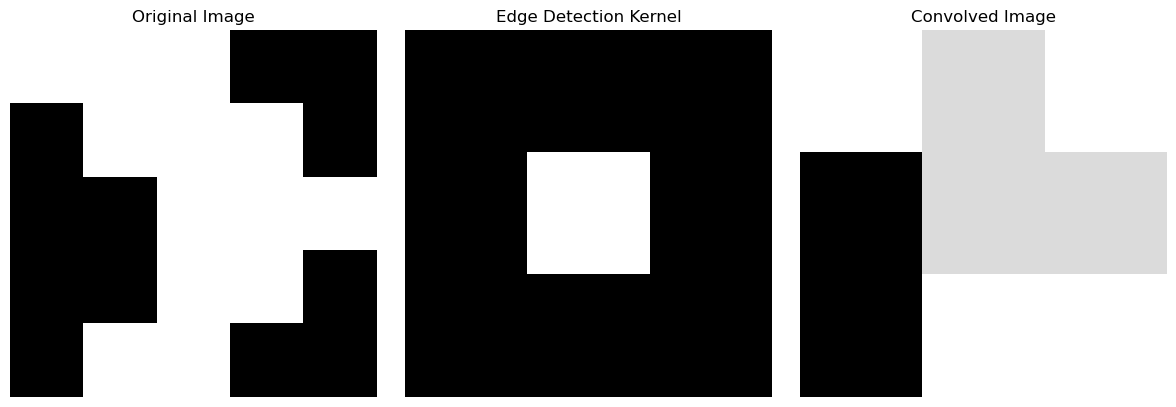

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Example of a simple 2D convolution operation (conceptual)
def apply_convolution(image, kernel, stride=1, padding=0):
    # Add padding if specified
    if padding > 0:
        image = np.pad(image, padding, mode='constant', constant_values=0)

    image_h, image_w = image.shape
    kernel_h, kernel_w = kernel.shape

    output_h = (image_h - kernel_h) // stride + 1
    output_w = (image_w - kernel_w) // stride + 1

    output = np.zeros((output_h, output_w))

    for i in range(output_h):
        for j in range(output_w):
            # Extract the patch
            patch = image[i*stride:i*stride + kernel_h, j*stride:j*stride + kernel_w]
            # Perform element-wise multiplication and sum
            output[i, j] = np.sum(patch * kernel)
    return output

# Define a simple image and a filter
image = np.array([[1, 1, 1, 0, 0],
                  [0, 1, 1, 1, 0],
                  [0, 0, 1, 1, 1],
                  [0, 0, 1, 1, 0],
                  [0, 1, 1, 0, 0]])

edge_detection_kernel = np.array([[-1, -1, -1],
                                  [-1,  8, -1],
                                  [-1, -1, -1]])

# Apply convolution
convolved_image = apply_convolution(image, edge_detection_kernel, stride=1, padding=0)

print("Original Image:")
print(image)
print("Edge Detection Kernel:")
print(edge_detection_kernel)
print("Convolved Image (Feature Map):")
print(convolved_image)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(edge_detection_kernel, cmap='gray')
plt.title('Edge Detection Kernel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(convolved_image, cmap='gray')
plt.title('Convolved Image')
plt.axis('off')

plt.tight_layout()
plt.show()

This example demonstrates how a convolutional layer, using a specific filter, can transform an input image into a feature map that highlights certain patterns, in this case, edges.


### 3.2. Activation Functions (ReLU)

After a convolution operation, the output (feature map) is typically passed through an **activation function**. The primary role of an activation function is to introduce **non-linearity** into the neural network. Without non-linearity, a neural network, no matter how many layers it has, would essentially behave like a single linear model, limiting its ability to learn complex patterns in data.

For CNNs, the most commonly used activation function is the **Rectified Linear Unit (ReLU)**.

**ReLU Function:**
$$
ReLU(x) = \max(0, x)$$


**Properties and Advantages of ReLU:**
*   **Non-linearity:** It allows the model to learn more complex relationships than linear functions alone.
*   **Computational Efficiency:** ReLU is very simple to compute (just a `max` operation), making it computationally efficient compared to other activation functions like sigmoid or tanh, especially in deep networks.
*   **Mitigates Vanishing Gradient Problem:** For positive inputs, the gradient is always 1, which helps in preventing the vanishing gradient problem that can occur with sigmoid or tanh functions in deep networks, allowing for faster and more stable training.
*   **Sparsity:** It outputs 0 for negative inputs, leading to sparse activations. This can make the network more efficient and less prone to overfitting.

**Visualizing ReLU:**

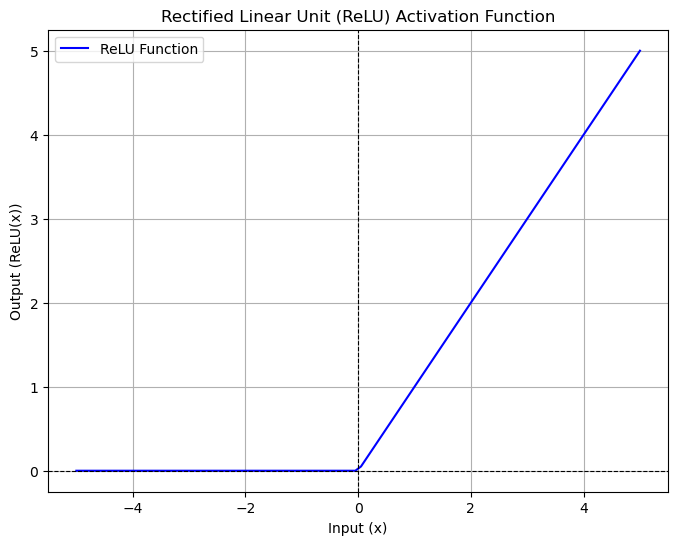

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

x = np.linspace(-5, 5, 100)
y_relu = relu(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y_relu, label='ReLU Function', color='blue')
plt.title('Rectified Linear Unit (ReLU) Activation Function')
plt.xlabel('Input (x)')
plt.ylabel('Output (ReLU(x))')
plt.grid(True)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend()
plt.show()


After the convolutional layer applies its filters to produce feature maps, the ReLU activation function is applied element-wise to these feature maps. This step ensures that the network can learn from non-linear relationships in the image data.


### Pooling Layer

Following the convolutional layer and activation function, a **Pooling Layer** is often used. The primary functions of a pooling layer are:

*   **Dimensionality Reduction:** It reduces the spatial dimensions (width and height) of the feature maps, which helps to decrease the computational cost and the number of parameters in the network.
*   **Feature Invariance:** It makes the learned features more robust to small translations, rotations, and scaling in the input image. This means that if a feature (e.g., an edge) shifts slightly in the image, the pooling layer will still detect it.
*   **Reduces Overfitting:** By reducing the number of parameters, pooling can help to prevent the model from overfitting to the training data.

There are several types of pooling operations, but the most common one used in CNNs is **Max Pooling**.

**Max Pooling:**

Max pooling operates by sliding a small window (e.g., 2x2) over the input feature map and taking the maximum value within that window. All other values within the window are discarded.

*   **Filter Size:** Defines the dimensions of the window (e.g., 2x2, 3x3).
*   **Stride:** Determines how many pixels the window moves at each step. A common stride for max pooling is equal to the filter size (e.g., a 2x2 filter with a stride of 2), which means the windows do not overlap.

**Example of Max Pooling:**

Consider a 4x4 feature map and a 2x2 max pooling filter with a stride of 2.

**Input Feature Map (4x4):**
```
[[1, 1, 2, 4],
 [5, 6, 7, 8],
 [3, 2, 1, 0],
 [1, 2, 3, 4]]
```

**Max Pooling (2x2 filter, stride 2):**

*   Top-left 2x2 patch: `[[1, 1], [5, 6]]` -> Max value is 6.
*   Top-right 2x2 patch: `[[2, 4], [7, 8]]` -> Max value is 8.
*   Bottom-left 2x2 patch: `[[3, 2], [1, 2]]` -> Max value is 3.
*   Bottom-right 2x2 patch: `[[1, 0], [3, 4]]` -> Max value is 4.

**Output Pooled Feature Map (2x2):**
```
[[6, 8],
 [3, 4]]
```

Original Feature Map:
[[1 1 2 4]
 [5 6 7 8]
 [3 2 1 0]
 [1 2 3 4]]
Pooled Feature Map (2x2 filter, stride 2):
[[6. 8.]
 [3. 4.]]


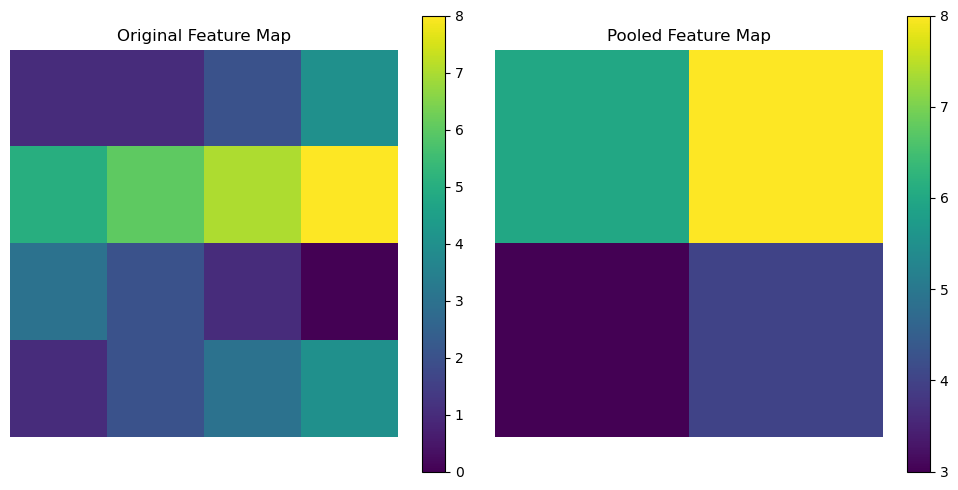

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def apply_max_pooling(feature_map, pool_size=(2, 2), stride=2):
    map_h, map_w = feature_map.shape
    pool_h, pool_w = pool_size

    output_h = (map_h - pool_h) // stride + 1
    output_w = (map_w - pool_w) // stride + 1

    pooled_output = np.zeros((output_h, output_w))

    for i in range(output_h):
        for j in range(output_w):
            # Extract the patch
            patch = feature_map[i*stride:i*stride + pool_h, j*stride:j*stride + pool_w]
            # Take the maximum value from the patch
            pooled_output[i, j] = np.max(patch)
    return pooled_output

# Define a sample feature map
feature_map = np.array([[1, 1, 2, 4],
                        [5, 6, 7, 8],
                        [3, 2, 1, 0],
                        [1, 2, 3, 4]])

# Apply max pooling
pooled_map = apply_max_pooling(feature_map)

print("Original Feature Map:")
print(feature_map)
print("Pooled Feature Map (2x2 filter, stride 2):")
print(pooled_map)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(feature_map, cmap='viridis')
plt.title('Original Feature Map')
plt.colorbar()
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(pooled_map, cmap='viridis')
plt.title('Pooled Feature Map')
plt.colorbar()
plt.axis('off')

plt.tight_layout()
plt.show()

Pooling layers effectively summarize the presence of features in regions, making the network more robust to variations in the exact position of features and reducing the computational burden for subsequent layers.


### Fully Connected Layers

After several convolutional and pooling layers, the high-level features extracted from the image are typically fed into one or more **Fully Connected (Dense) Layers**. These layers are similar to the layers found in a traditional Multilayer Perceptron (MLP).

**Role of Fully Connected Layers in CNNs:**

*   **Flattening:** Before connecting to the fully connected layers, the 3D output of the final convolutional or pooling layer (e.g., `height x width x depth`) is "flattened" into a 1D vector. This vector represents a high-level, abstract representation of the features learned from the input image.
*   **Classification:** The flattened feature vector is then passed through one or more dense layers. These layers learn non-linear combinations of these features to make the final classification decision. Each neuron in a fully connected layer is connected to every neuron in the previous layer.
*   **Output Layer:** The final fully connected layer typically has a number of neurons equal to the number of classes in the classification problem (e.g., 10 neurons for MNIST digits 0-9). For multi-class classification, a **softmax activation function** is applied to the output layer. Softmax converts the raw output scores (logits) into a probability distribution, where each value represents the probability of the input belonging to a specific class, and all probabilities sum up to 1.

**Example of Softmax Activation:**

If the output layer of a CNN for MNIST produces raw scores (logits) like `[2.0, 0.1, -1.5, ..., 3.0]` for the 10 digits, the softmax function would transform these into probabilities, for example, `[0.09, 0.01, 0.00, ..., 0.85]`, where the sum of these probabilities is 1. The class with the highest probability is then chosen as the model"s prediction.



In [19]:
import numpy as np

def softmax(x):
    e_x = np.exp(x - np.max(x)) # Subtracting np.max(x) for numerical stability
    return e_x / e_x.sum(axis=0)

# Example raw scores (logits) for 10 classes
logits = np.array([2.0, 0.1, -1.5, 0.5, 1.2, -0.8, 3.0, 0.0, 1.8, -0.3])

probabilities = softmax(logits)

print("Raw Logits:")
print(logits)
print("Softmax Probabilities:")
print(probabilities)
print("Sum of Probabilities: {:.4f}".format(np.sum(probabilities)))
print("Predicted Class (index):", np.argmax(probabilities))

Raw Logits:
[ 2.   0.1 -1.5  0.5  1.2 -0.8  3.   0.   1.8 -0.3]
Softmax Probabilities:
[0.17588164 0.02630637 0.00531117 0.0392445  0.07902871 0.01069537
 0.47809586 0.02380299 0.1439997  0.01763369]
Sum of Probabilities: 1.0000
Predicted Class (index): 6



In summary, the convolutional and pooling layers act as feature extractors, learning increasingly complex representations of the input image. The fully connected layers then take these learned features and use them to perform the final classification task.


## Step 1: Data Loading and Preprocessing (with PyTorch)

The **MNIST dataset** is built into PyTorch.  
We will:
1. Download the dataset (if not already available).
2. Convert images into **tensors** (so PyTorch can work with them).
3. Normalize pixel values (0–255 → -1 to 1), which helps the network learn faster.
4. Organize data into **mini-batches** for training.

PyTorch uses:
- **`torchvision.datasets.MNIST`** → loads the dataset.
- **`torch.utils.data.DataLoader`** → helps us loop through the dataset in batches.
- **`torchvision.transforms`** → preprocesses the data (e.g., tensor conversion, normalization).


In [21]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformations: convert to tensor + normalize
transform = transforms.Compose([
    transforms.ToTensor(),               # Convert images (28x28) → tensors
    transforms.Normalize((0.5,), (0.5,)) # Normalize grayscale (mean=0.5, std=0.5)
])

# Load training and test datasets
train_dataset = datasets.MNIST(
    root="./data", train=True, download=True, transform=transform
)
test_dataset = datasets.MNIST(
    root="./data", train=False, download=True, transform=transform
)

# Create DataLoaders (batches of data)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=1000, shuffle=False)

print(f"Training samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")


Training samples: 60000
Test samples: 10000


### Why do we use batches?
Instead of training on all 60,000 MNIST images at once (which is too big for memory),  
we split the dataset into **mini-batches** (e.g., 64 images at a time).  
This makes training:
- Faster ⏩
- More memory-efficient 💾
- Better at generalizing 📈


## Step 2: Building a Multilayer Perceptron (MLP) with PyTorch

An **MLP (Multilayer Perceptron)** is the simplest type of neural network.  
It has:
- An **input layer** (for the 784 pixels in a 28x28 MNIST image).
- One or more **hidden layers** (where the network learns patterns).
- An **output layer** (10 neurons → one for each digit 0–9).

### How it works
1. Flatten the image (28x28 → 784).
2. Pass through hidden layers with activation functions (**ReLU**).
3. Get raw outputs (**logits**) from the last layer.
4. Apply **Softmax** during loss calculation to convert logits → probabilities.


In [22]:
import torch.nn as nn
import torch.nn.functional as F

# Define MLP architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # Input: 784 → Hidden: 128
        self.fc2 = nn.Linear(128, 64)     # Hidden: 128 → Hidden: 64
        self.fc3 = nn.Linear(64, 10)      # Hidden: 64 → Output: 10 classes

    def forward(self, x):
        x = x.view(-1, 28*28)   # Flatten images from (1,28,28) → (784,)
        x = F.relu(self.fc1(x)) # First hidden layer + ReLU
        x = F.relu(self.fc2(x)) # Second hidden layer + ReLU
        x = self.fc3(x)         # Output layer (logits)
        return x


### Notes
- **`nn.Linear`** creates a fully connected (dense) layer.  
- **ReLU (Rectified Linear Unit)** helps the network learn non-linear patterns.  
- The final layer has **10 neurons** (one for each digit).  
- We don’t apply Softmax here because **`nn.CrossEntropyLoss`** (which we’ll use later) does that internally.


## Step 3: Training the MLP

To train our network, we need three key components:

1. **Loss function** → measures how far off our predictions are.  
   - We use `CrossEntropyLoss`, which combines **LogSoftmax + Negative Log Likelihood**.  
   - Perfect for classification tasks (like MNIST digits).  

2. **Optimizer** → updates weights using gradients from backpropagation.  
   - We’ll use **Adam** (a popular optimizer that adapts the learning rate).  

3. **Training loop** → repeat for several epochs:
   - Get a batch of data.  
   - Do a **forward pass** (input → output).  
   - Compute the loss.  
   - Do a **backward pass** (compute gradients).  
   - Update weights using the optimizer.  


In [23]:
import torch.optim as optim

# Device setup (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Initialize model, loss, optimizer
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 5
for epoch in range(epochs):
    model.train()  # set to training mode
    total_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()        # reset gradients
        outputs = model(images)      # forward pass
        loss = criterion(outputs, labels)  # compute loss
        loss.backward()              # backward pass
        optimizer.step()             # update weights

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")


Using device: cpu
Epoch 1/5, Loss: 0.4056
Epoch 2/5, Loss: 0.1903
Epoch 3/5, Loss: 0.1366
Epoch 4/5, Loss: 0.1107
Epoch 5/5, Loss: 0.0950


### Key Points 
- **`model.train()`** → tells PyTorch we are training (activates dropout, batchnorm if present).  
- **`optimizer.zero_grad()`** → clears old gradients (otherwise they accumulate).  
- **`loss.backward()`** → calculates gradients with respect to weights.  
- **`optimizer.step()`** → updates weights using those gradients.  
- We loop over the dataset multiple times (**epochs**) to improve learning.  


## Step 4: Evaluating the MLP

After training, we need to check how well our model performs on **unseen data** (the test set).

Steps:
1. Switch the model to **evaluation mode** with `model.eval()`.  
   - This turns off things like dropout (if used).  
2. Disable gradient calculation with `torch.no_grad()` (saves memory & speed).  
3. Run the model on test data.  
4. Compare predictions vs true labels.  
5. Compute accuracy.


In [24]:
model.eval()  # set to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # no need to compute gradients
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)             # forward pass
        _, predicted = torch.max(outputs, 1) # get index of highest logit
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 96.24%


### 🔑 Key Points
- **`model.eval()`** → tells PyTorch we are testing, not training.  
- **`torch.no_grad()`** → speeds things up by stopping gradient tracking.  
- **`torch.max(outputs, 1)`** → picks the class with the highest score (logit).  
- We then compare predictions with actual labels to compute accuracy.  


## Step 4b: Visualizing Predictions

It’s helpful to **see what the model predicts** for some test images.  
We will:
1. Take a batch of test images.  
2. Run the model to get predictions.  
3. Show the images alongside their predicted and true labels.  


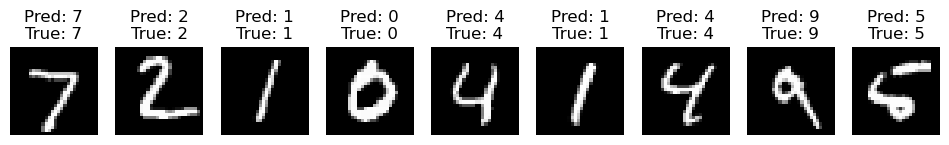

In [27]:
import matplotlib.pyplot as plt

# Get one batch of test images
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)

# Make predictions
model.eval()
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

# Plot the first 6 images with predictions
fig, axes = plt.subplots(1, 9, figsize=(12, 3))
for i in range(9):
    axes[i].imshow(images[i].cpu().squeeze(), cmap="gray")
    axes[i].set_title(f"Pred: {predicted[i].item()}\nTrue: {labels[i].item()}")
    axes[i].axis("off")

plt.show()


### You Should Notice
- If the model has trained well, most predictions should match the true labels.  
- Sometimes the model may make mistakes (e.g., confusing a **4** with a **9**), especially with messy handwriting.  
- Visualizing results helps build intuition about how well the model really understands the data.  


## Step 5: Building a Convolutional Neural Network (CNN)

While MLPs work, they don’t make the best use of image structure.  
A **Convolutional Neural Network (CNN)** is designed specifically for images.

### Why CNNs are better for images
- They look at **local regions** (like edges, corners, shapes).  
- They use **filters (kernels)** to automatically learn patterns.  
- They keep the **spatial structure** of images (unlike flattening in MLP).  

A basic CNN for MNIST:
1. **Convolution layers** → detect features (edges, shapes).  
2. **Pooling layer** → reduces size but keeps important info.  
3. **Fully connected layers** → combine features to predict digits (0–9).  


In [28]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)  # 1 input channel (grayscale), 32 filters
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1) # 32 → 64 filters

        # Pooling layer
        self.pool = nn.MaxPool2d(2, 2)  # reduce size by 2x

        # Fully connected layers
        self.fc1 = nn.Linear(64 * 7 * 7, 128) # after pooling, image size = 7x7
        self.fc2 = nn.Linear(128, 10)        # output 10 classes

        # Dropout (helps prevent overfitting)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # Convolution + ReLU + Pooling
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))

        # Flatten for fully connected layers
        x = x.view(-1, 64 * 7 * 7)

        # Fully connected + dropout
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


### Key Notes
- **`nn.Conv2d(in_channels, out_channels, kernel_size)`** → convolution layer.
  - `in_channels = 1` because MNIST images are grayscale.
  - `out_channels = number of filters` (the features we learn).
- **`nn.MaxPool2d(2,2)`** → takes the max value from each 2x2 block (reduces size).
- **Dropout** randomly turns off some neurons during training to avoid overfitting.
- By stacking conv → pool → conv → pool → fc layers, CNNs learn hierarchical features:
  - Early layers = edges, curves.  
  - Later layers = digit shapes.  


## Step 6: Training and Evaluating the CNN

We’ll now train the **CNN** just like we trained the MLP:
1. Initialize the CNN model.  
2. Use the **CrossEntropyLoss** and **Adam optimizer**.  
3. Run through multiple epochs:
   - Forward pass → compute predictions.  
   - Compute loss.  
   - Backward pass → compute gradients.  
   - Optimizer updates the weights.  
4. Evaluate accuracy on the test set.  


In [29]:
# Initialize CNN model
cnn_model = CNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

# Training loop for CNN
epochs = 5
for epoch in range(epochs):
    cnn_model.train()
    total_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = cnn_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")


Epoch 1/5, Loss: 0.1787
Epoch 2/5, Loss: 0.0600
Epoch 3/5, Loss: 0.0426
Epoch 4/5, Loss: 0.0337
Epoch 5/5, Loss: 0.0281


In [30]:
# Evaluation on test set
cnn_model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = cnn_model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"CNN Test Accuracy: {accuracy:.2f}%")


CNN Test Accuracy: 98.91%


### What to Expect
- The CNN usually performs **better** than the MLP on MNIST.  
- While the MLP might reach ~97–98% accuracy, the CNN can go above **99%**.  
- This shows the **power of convolution** in handling image data.  


## Step 7: Visualizing CNN Predictions

It’s important to **see the results** of our trained CNN.  
We’ll:
1. Take a batch of test images.  
2. Run them through the CNN.  
3. Display the images with both **predicted** and **true** labels.  


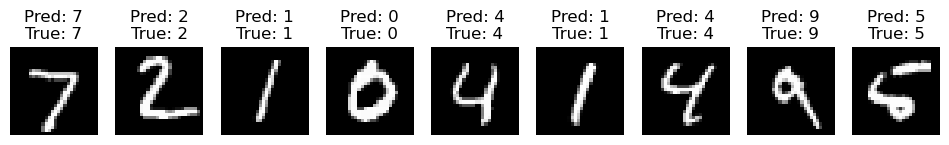

In [32]:
# Get one batch of test images
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)

# Make predictions
cnn_model.eval()
with torch.no_grad():
    outputs = cnn_model(images)
    _, predicted = torch.max(outputs, 1)

# Plot the first 6 images with predictions
fig, axes = plt.subplots(1, 9, figsize=(12, 3))
for i in range(9):
    axes[i].imshow(images[i].cpu().squeeze(), cmap="gray")
    axes[i].set_title(f"Pred: {predicted[i].item()}\nTrue: {labels[i].item()}")
    axes[i].axis("off")

plt.show()


### Key Takeaways
- If training went well, predictions should mostly match the true labels.  
- Mistakes may happen on unclear digits (e.g., a sloppy **5** might look like a **6**).  
- Visualization helps us build intuition about the **strengths and weaknesses** of our model.  


## Step 8: Comparing MLP vs CNN Performance

Now that we’ve trained both models, let’s compare them.

### Key Observations
1. **MLP (Multilayer Perceptron)**
   - Treats the image as a long list of numbers (784 pixels).  
   - Doesn’t take into account the *spatial structure* of the image.  
   - Accuracy is good (~97–98%), but not the best for image tasks.  

2. **CNN (Convolutional Neural Network)**
   - Looks at local regions (using filters) → learns edges, shapes, and digit patterns.  
   - Keeps the 2D structure of the image intact.  
   - Accuracy is higher (~99%), making it more reliable for real-world image recognition.  

### Performance Recap
- MLP: simpler, faster, great for learning the basics.  
- CNN: more powerful, the standard choice for images.  


In [33]:
# Quick function to evaluate accuracy (for reuse)
def evaluate_model(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

mlp_acc = evaluate_model(model, test_loader)
cnn_acc = evaluate_model(cnn_model, test_loader)

print(f"MLP Accuracy: {mlp_acc:.2f}%")
print(f"CNN Accuracy: {cnn_acc:.2f}%")


MLP Accuracy: 96.24%
CNN Accuracy: 98.91%


### 5.2. One-Hot Encoding Labels

For multi-class classification problems, especially when using categorical cross-entropy as the loss function, it is common practice to convert integer labels into a **one-hot encoded** format. One-hot encoding transforms a single integer label into a binary vector where only one element is "hot" (1) and the rest are 0.

For example, if we have 10 classes (digits 0-9):
*   The digit `3` would be represented as `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`
*   The digit `7` would be represented as `[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]`

This format is suitable for training neural networks with a softmax output layer, as each output neuron corresponds to the probability of belonging to a specific class.


### Conclusion
- **MLP** taught us the basics of how neural networks work.  
- **CNN** showed us how adding convolutional layers makes a huge difference for images.  
- This is why modern computer vision tasks (like face recognition, medical imaging, self-driving cars) all rely on **CNNs (or even more advanced architectures like ResNets, Transformers, etc.)**.  
